In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Ingest the Dataset

In [2]:
data = pd.read_csv('HT_Affordability.csv')

In [3]:
reduced_data = data[['tract', 'cbsa', 'h_ami', 't_ami']]
reduced_data = reduced_data.loc[(reduced_data['h_ami'] <= 27) | (reduced_data['h_ami'] >= 37), :]
reduced_data = reduced_data.loc[(reduced_data['t_ami'] <= 22) | (reduced_data['t_ami'] >= 30), :]

# Plot the Dataset
Create a scatterplot of the h_ami (Housing Index) and t_ami (Transportation Index) for each census tract in the dataset

Text(0, 0.5, 'Transportation Index')

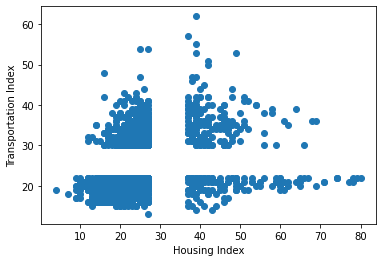

In [4]:
plt.scatter(reduced_data['h_ami'], reduced_data['t_ami'])
plt.xlabel("Housing Index")
plt.ylabel("Transportation Index")

# Implement K-Means Clustering
Using the scikit-learn documentation or online tutorials, determine how to create a Kmeans() object and fit the object to the two axes of data (Housing Index & Tranportation Index). Based on the results of the scatterplot, choose the number of clusters that best matches your intuition. 

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(reduced_data[['h_ami', 't_ami']])

KMeans(n_clusters=4, random_state=0)

# Plot the Clusters
Using the "c" parameter in the scatterplot, plot the scatterplot once again where each point is labeled based on the cluster that it belongs to

Text(0, 0.5, 'Transportation Index')

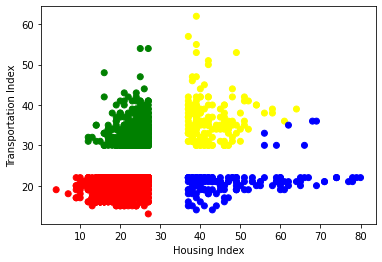

In [6]:
colors = {0:'red', 1:'yellow', 2:'blue', 3:'green'}
label_colors = [colors[label] for label in kmeans.labels_]
plt.scatter(reduced_data['h_ami'], reduced_data['t_ami'], c=label_colors)
plt.xlabel("Housing Index")
plt.ylabel("Transportation Index")

# Metrics for Clustering
If you chose 4 clusters for your algorithm, you'll see that K-Means produces a relatively solid clustering. But this raises a more fundamental question: how do you choose the number of clusters for a clustering algorithm in the first place? In our case, it was relatively easy to choose the number of clusterings because the data was 2-D and easy to visualize. However, clustering algorithms aren't always used with such a simple dataset. Therefore, there must be a more systematic way to identify appropriate the number of necessary clusters. One method that calculates the number of necessary clusters is the "elbow" method. 

The elbow method involves testing a set of possible clusterings and then plotting a metric indicating the strength of the clustering for each # of clusters. At some point, the addition of a new cluster will yield little difference in the metric which will be an indication that further clusters are no longer necessary. 

### Elbow Plot for Inertia Metric
The "inertia" of a clustering is the sum of the squared distances between every data point and its closest center (the center is typically the average of the data points in the cluster). For this task, test out the k-means algorithm with clusterings between 1 and 11, and plot the inertia at each clustering. What does the elbow plot identify as the optimal number of clusters?

*HINT: You don't need to calculate the inertia yourself. Use scikit-learn documentation to find out how to access the inertia directly.*



In [7]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_data[['h_ami', 't_ami']])
    inertias.append(kmeans.inertia_)

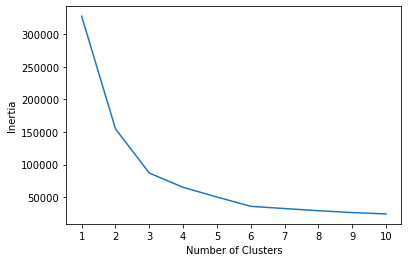

In [8]:
plt.plot(range(1, 11), inertias)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

The elbow plot identifies n=6 as the optimal number of clusters. Intuitively, we know that n=4 would make far more sense. This disconnect between the elbow plot and intuition highlights the unique difficulties of developing unsupervised machine learning models. The clusterings that are most apparent to the human-eye are not immediately obvious to a mathematical model. 